In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from PIL import Image
from sklearn import datasets
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, random_split
# 데이터셋 불러오고 미니 배치를 사용하기위해서

In [45]:
class CustomDataset(Dataset):
    def __init__(self):
        self.x = [[10,20],
                  [20,30],
                  [30,40],
                  [40,50],
                  [50,60]]

        self.y = [0,0,1,1,1]


    def __len__(self):
        return len(self.x)


    def __getitem__(self, item):
        input_data = self.x[item] # 인풋
        label_data = self.y[item] # 정답
        return torch.tensor(input_data), torch.tensor(label_data)


    def __str__(self):
        return 'CustomDataset'


# 클래스 호출하고 x,y생성
# 리스트에 잇는걸 텐서로 바꿔서 인덱스 별로 가져옴


In [46]:
custom_dataset = CustomDataset()

# CSV data utilization

In [47]:
abalone_df = pd.read_csv(
    'https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv',
    names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weight', 'Shell weight', 'Age']
)
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3320 non-null   float64
 1   Diameter        3320 non-null   float64
 2   Height          3320 non-null   float64
 3   Whole weight    3320 non-null   float64
 4   Shucked weight  3320 non-null   float64
 5   Viscera weight  3320 non-null   float64
 6   Shell weight    3320 non-null   float64
 7   Age             3320 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 207.6 KB


In [48]:
abalone_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [49]:
input_data = abalone_df.drop(columns = ['Age']).to_numpy().astype('float32')
target_data = abalone_df['Age'].to_numpy().astype('float32')
# to_numpy = dataframe -> numpy / in pd
# numpy() = tensor -> numpy / in torch

In [50]:
print(input_data.shape)
print(target_data.shape)

(3320, 7)
(3320,)


In [51]:
class AbaloneDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data


    def __len__(self):
        return len(self.input_data)


    def __getitem__(self, item):
        input_data = self.input_data[item]
        target_data = self.target_data[item]
        return torch.tensor(input_data), torch.tensor(target_data)


    def __str__(self):
        return 'AbaloneDataset'



In [52]:
abalone_dataset = AbaloneDataset(input_data, target_data)
print(len(abalone_dataset))
print(abalone_dataset[4])

3320
(tensor([0.5450, 0.4200, 0.1300, 0.8790, 0.3740, 0.1695, 0.2300]), tensor(13.))


# image data utilization

In [53]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xvf ./flower_photos.tgz > /dev/null 2>&1

--2025-09-10 15:52:06--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 34.128.10.91, 34.128.9.187, 34.128.9.251, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.128.10.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz.6’

flower_photos.tgz.6 100%[===================>] 218.21M  29.2MB/s    in 7.6s    

2025-09-10 15:52:14 (28.7 MB/s) - ‘flower_photos.tgz.6’ saved [228813984/228813984]



In [54]:
import glob
image_paths = glob.glob('./data/flower_photos/*/*.jpg')
# 경로로 이동해서 .jpg만 가져와서 리스트로 만들어놔
print(image_paths)
# 이미지 한번에 불러오긴 힘들어서 경로만 받아옴

['./data/flower_photos/roses/16209331331_343c899d38.jpg', './data/flower_photos/roses/5777669976_a205f61e5b.jpg', './data/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg', './data/flower_photos/roses/15011625580_7974c44bce.jpg', './data/flower_photos/roses/17953368844_be3d18cf30_m.jpg', './data/flower_photos/roses/8983268106_dc913d17d8_m.jpg', './data/flower_photos/roses/6803363808_9f9ce98186_m.jpg', './data/flower_photos/roses/8388497874_1fe750cc95_m.jpg', './data/flower_photos/roses/14267691818_301aceda07.jpg', './data/flower_photos/roses/4558025386_2c47314528.jpg', './data/flower_photos/roses/17990320484_93bba345d2_m.jpg', './data/flower_photos/roses/4608559939_3487bf3b62_n.jpg', './data/flower_photos/roses/18599603859_f2ec616ddf_n.jpg', './data/flower_photos/roses/8723767157_c45bfd3ab6.jpg', './data/flower_photos/roses/8523394349_61b31fdd8f_m.jpg', './data/flower_photos/roses/13279526615_a3b0059bec.jpg', './data/flower_photos/roses/3407482427_49d5c75291_m.jpg', './data/flower_photo

In [55]:
class FlowerDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths
# 이미지 한번에 불러오긴 힘들어서 경로만 받아옴

    def __len__(self):
        return len(self.image_paths)

# 이미지 한번에 불러오긴 힘들어서 경로만 받아옴
    # 리스트에서 하나씩 가져오기
    def __getitem__(self, item) -> torch.Tensor:
        image_path = self.image_paths[item]
        image = Image.open(image_path) # 경로의 이미지를 연다.
        print(type(image))
        #<class 'PIL.JpegImagePlugin.JpegImageFile'>

        # PIL image -> np -> tensor
        image_np = np.array(image)
        return torch.tensor(image_np)
# tensor 형태로는 못봐서 넘파이로 변경함

# 여기서 나가는건 보기위해서가 아니고 학습시키려고 텐서로 내보내서 가공하고
# show_image에서 넘파이로 변경해서 읽기

In [56]:
flower = FlowerDataset(image_paths)
print(len(flower)) # 3670장

3670


In [57]:
def show_image(image_tensor):
    image = image_tensor.numpy() # 텐서를 넘파이로 바꿈, 메모리 공유
    #tensor.from_numpy() # 넘파이 -> 텐서, 메모리 공유
    # image = image_tensor
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap='gray')
    plt.axis('off') # 선 없애기

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


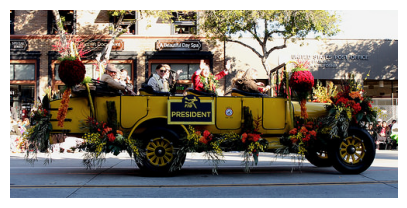

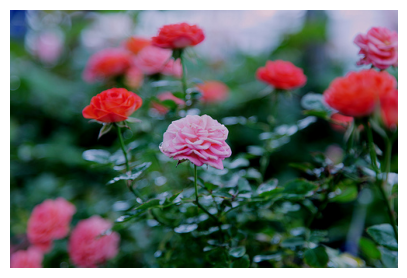

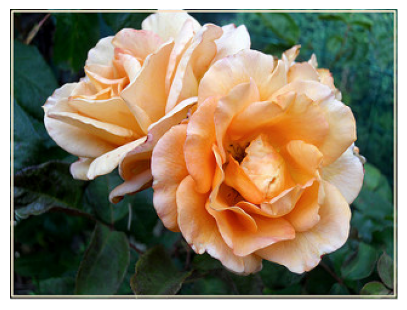

In [58]:
for i in range(3):
    show_image(flower[i])

# 실습
캘리포니아 하우징

In [59]:
class CalHousingDataSet(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data


    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, item):
        input_data = self.input_data[item]
        target_data = self.target_data[item]
        return torch.tensor(input_data), torch.tensor(target_data)

    def __str__(self):
        return 'CalHousingDataSet'

In [60]:
cal_housing = datasets.fetch_california_housing()


input_data = cal_housing.data.astype(np.float32)
target_data = cal_housing.target.astype(np.float32)

In [61]:
cal_dataset = CalHousingDataSet(input_data, target_data)
print(len(cal_dataset))

print(cal_dataset[0])

20640
(tensor([   8.3252,   41.0000,    6.9841,    1.0238,  322.0000,    2.5556,
          37.8800, -122.2300]), tensor(4.5260))


# 데이터 분할

In [62]:
abalone_df = pd.read_csv(
    'https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv',
    names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weight', 'Shell weight', 'Age']
)

input_data = abalone_df.drop(columns=['Age']).to_numpy().astype(np.float32)
target_data = abalone_df['Age'].to_numpy().astype(np.float32)

class AbaloneDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data

    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index])
        target_tensor = torch.tensor(self.target_data[index])
        return input_tensor, target_tensor

In [78]:

# 전체 Dataset 생성
full_dataset = AbaloneDataset(input_data, target_data)

# train/val/test 비율 설정
train_size = int(len(full_dataset) * 0.8)
val_size = int(len(full_dataset) * 0.1)
test_size = len(full_dataset) - (train_size + val_size)

# 랜덤 분할
train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size]
)

print(len(train_dataset), len(val_dataset), len(test_dataset))

2656 332 332


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
# 왜 train에서만?

StandardScaler()

In [80]:
train_inputs_scaled = scaler.transform(train_inputs)
val_inputs_scaled = scaler.transform(val_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

In [81]:
abalone_df.describe()
# 이미 대부분이 0~1값이라서 normalized는 안해도 되는거로 판단
# standardizaion만 하였음.
# scale = True는 normalization, 지금 한 scaler = standardization

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000
mean,0.522693,0.406575,0.139271,0.824734,0.357705,0.180162,0.237921,9.896988
std,0.121164,0.100120,0.042708,0.491182,0.222223,0.110182,0.140261,3.205654
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.115000,0.436375,0.181500,0.092000,0.127375,8.000000
50%,0.540000,0.425000,0.140000,0.795250,0.335500,0.170750,0.230000,9.000000
75%,0.615000,0.480000,0.165000,1.150000,0.504500,0.253125,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000


In [68]:
print(train_inputs[0])
print(train_inputs_scaled[0])

print(train_inputs_scaled.mean(axis=0))
print(train_inputs_scaled.std(axis=0))

[0.435  0.335  0.11   0.334  0.1355 0.0775 0.0965]
[-0.72538686 -0.7183045  -0.6804534  -1.0057095  -1.0076431  -0.93610436
 -1.0115972 ]
[ 0.0069348   0.00347807 -0.00216498  0.00376609  0.00359727  0.00373735
  0.0015973 ]
[0.9918655  0.99362683 0.99837214 1.0033909  1.0050509  1.0026641
 0.9982923 ]


In [69]:
train_dataset = AbaloneDataset(train_inputs_scaled, train_targets)
val_dataset = AbaloneDataset(val_inputs_scaled, val_targets)
test_dataset = AbaloneDataset(test_inputs_scaled, test_targets)
print(len(train_dataset))
# 아까는 standardization 적용하기전꺼 넣은거 지금은 적용하고 새로 넣은 거임

2656


In [83]:
scaler.inverse_transform([train_dataset[0][0]])
# 스케일링 하기 전의 원래값 보기

array([[0.58083077, 0.44383116, 0.14585409, 1.10937194, 0.40829252,
        0.19267822, 0.26385789]])

In [84]:
# from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
# 8 row가 한 배치에 들어감.



In [85]:
for train_batch in train_dataloader:
    print(train_batch[0])
    print(train_batch[1])

tensor([[0.5750, 0.4600, 0.1650, 0.9575, 0.4815, 0.1945, 0.2360],
        [0.2000, 0.1500, 0.0400, 0.0460, 0.0210, 0.0070, 0.0065],
        [0.4200, 0.3250, 0.1150, 0.2885, 0.1000, 0.0570, 0.1135],
        [0.6350, 0.5250, 0.1600, 1.1950, 0.5435, 0.2460, 0.3350]])
tensor([10.,  4., 15., 12.])
tensor([[0.5750, 0.4250, 0.1400, 0.8635, 0.3930, 0.2270, 0.2000],
        [0.5500, 0.4250, 0.1400, 0.9520, 0.4895, 0.1945, 0.2185],
        [0.6600, 0.5300, 0.1700, 1.4310, 0.6220, 0.3090, 0.3980],
        [0.4100, 0.3050, 0.0900, 0.3535, 0.1570, 0.0745, 0.1000]])
tensor([11.,  7., 10.,  7.])
tensor([[0.3150, 0.2300, 0.0800, 0.1375, 0.0545, 0.0310, 0.0445],
        [0.6150, 0.5250, 0.1550, 1.1375, 0.3670, 0.2360, 0.3700],
        [0.5700, 0.4250, 0.1400, 0.7655, 0.3310, 0.1400, 0.2400],
        [0.4750, 0.3500, 0.1250, 0.4225, 0.1905, 0.0790, 0.1355]])
tensor([ 5., 20., 10.,  9.])
tensor([[0.3850, 0.2800, 0.1000, 0.2755, 0.1305, 0.0610, 0.0725],
        [0.5100, 0.3400, 0.1800, 0.7005, 0.3120, 0.1

In [73]:
# drop_last
# 332개인데 300개로 자르면 남아있는 건 잘라버린다.
# 보통 메모리 특성 때문에 16, 32, 64로 나눠야할 때 메모리 효율이 제일 좋음

len(val_dataset)
val_dataloader = DataLoader(val_dataset, batch_size=300, shuffle=True, drop_last=True)
for val_batch in val_dataloader:
    print(f"input val: {val_batch[0]}")
    print(f"target val: {val_batch[1]}")
    break

input val: tensor([[ 1.2982,  1.7284,  1.3896,  ...,  1.0229,  2.4804,  2.5724],
        [-1.5926, -1.4174, -1.2555,  ..., -1.2697, -1.3637, -1.3817],
        [-0.4776, -0.5685, -0.3354,  ..., -0.5807, -0.6768, -0.9191],
        ...,
        [-0.2298, -0.0692,  0.0096,  ..., -0.7095, -0.0035,  0.0810],
        [-0.2298, -0.2689, -0.4504,  ..., -0.4204, -0.4721, -0.6735],
        [ 0.1006,  0.4302, -0.1054,  ..., -0.3345,  0.0374,  0.1878]])
target val: tensor([19.,  6.,  6., 11., 12.,  8.,  8., 12., 13.,  9., 14., 10.,  7., 11.,
        13., 13., 10.,  4.,  8., 11.,  7., 13., 11.,  7.,  8.,  9., 12., 10.,
         9.,  9.,  5., 10., 10., 10., 10.,  7.,  8.,  8.,  8., 13., 20., 15.,
         9., 13., 13., 17., 11., 11., 15.,  9., 10., 11., 10., 14.,  8., 10.,
        18.,  6., 10., 10., 13., 11.,  7.,  4.,  7.,  7., 10.,  2., 10.,  7.,
         7.,  8., 10.,  9., 10., 13., 10., 10.,  6., 10., 10.,  7.,  8.,  6.,
         7.,  4., 10., 15., 12., 10.,  5., 11.,  9., 10.,  9.,  8., 11.,  8